In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import cv2
import pickle
import os
import glob

import numpy as np
from matplotlib import pyplot as plt


In [72]:
import glob

image_paths = glob.glob('/content/drive/MyDrive/dip_classification/DATASET/TEST/**/*.jpg', recursive=True)

for path in image_paths:
    print(path)

/content/drive/MyDrive/dip_classification/DATASET/TEST/O/O_12952.jpg
/content/drive/MyDrive/dip_classification/DATASET/TEST/O/O_13069.jpg
/content/drive/MyDrive/dip_classification/DATASET/TEST/O/O_13022.jpg
/content/drive/MyDrive/dip_classification/DATASET/TEST/O/O_13370.jpg
/content/drive/MyDrive/dip_classification/DATASET/TEST/O/O_13579.jpg


In [73]:

class SearchEngine():

  def __init__(self) -> None:
    self.orb = cv2.ORB_create(3000)
    self.dataset_folder = '/content/drive/MyDrive/dip_classification/DATASET'
    self.features = {}
    self.index_dataset()


  def index_dataset(self):
    if os.path.exists('/content/drive/MyDrive/dip_classification/features/features.pkl'):
      print("features exists")
      self.load_features()
    else:
      print("features not exists")
      features = {}
      os.mkdir('/content/drive/MyDrive/dip_classification/features/')

      for pathfile in glob.iglob(self.dataset_folder + '/TEST/**/*.jpg', recursive=True):
        print("pathfile",pathfile)
        try:
          image = self.load_image(pathfile)
          features[pathfile] = self.extract_features(image)
        except:
          pass
      self.serialize_features(features)
      self.load_features()


  def load_image(self, path):
    print("load image")
    image = cv2.imread(path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image

  def extract_features(self, image):
    print("extract_features")
    _, descriptor = self.orb.detectAndCompute(image, None)
    return descriptor


  def serialize_features(self, features):
    print('[INFO] Serializing Features...')
    f = open('/content/drive/MyDrive/dip_classification/features/features.pkl', 'wb')
    f.write(pickle.dumps(features))
    f.close()

  def load_features(self):
    print('[INFO] Loading Features...')
    # self.features = pickle.load(open('/content/drive/MyDrive/dip_classification/features.pkl', 'rb').read() )
    self.features = pickle.loads(open('/content/drive/MyDrive/dip_classification/features/features.pkl', 'rb').read())

  def search(self, query):
    print("Search")
    query_image = self.load_image(query)
    descriptor_query = self.extract_features(query_image)
    matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    similarities = {}

    for image_path, descriptor_original in self.features.items():
      matches = matcher.match(descriptor_original, descriptor_query)
      similarity = self.compute_similarity(matches)
      similarities[image_path] = similarity

    similarities = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
    if similarities:
      result = next(iter(similarities))[0]
      print(result.split('/')[-2])
      self.show_result(result, query)
    else:
      print("No similar images found.")

  def show_result(self, result, query):
    fig, axes = plt.subplots(1, 2, figsize=(9, 9))
    for ax, img_title in zip(axes, ['Query Image', 'Result Image']):
      img = cv2.imread(query)
      ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
      ax.axis('off')
      ax.set_title(img_title)
    plt.show()

  def compute_similarity(self, matches):
    distances = [m.distance for m in matches]
    if len(distances) == 0:
      return 0
    distance = sum(distances) / len(distances)
    sim = 1 / (1 + distance)
    return sim








features not exists
pathfile /content/drive/MyDrive/dip_classification/DATASET/TEST/O/O_12952.jpg
load image
extract_features
pathfile /content/drive/MyDrive/dip_classification/DATASET/TEST/O/O_13069.jpg
load image
extract_features
pathfile /content/drive/MyDrive/dip_classification/DATASET/TEST/O/O_13022.jpg
load image
extract_features
pathfile /content/drive/MyDrive/dip_classification/DATASET/TEST/O/O_13370.jpg
load image
extract_features
pathfile /content/drive/MyDrive/dip_classification/DATASET/TEST/O/O_13579.jpg
load image
extract_features
[INFO] Serializing Features...
[INFO] Loading Features...
Search
load image
extract_features
O


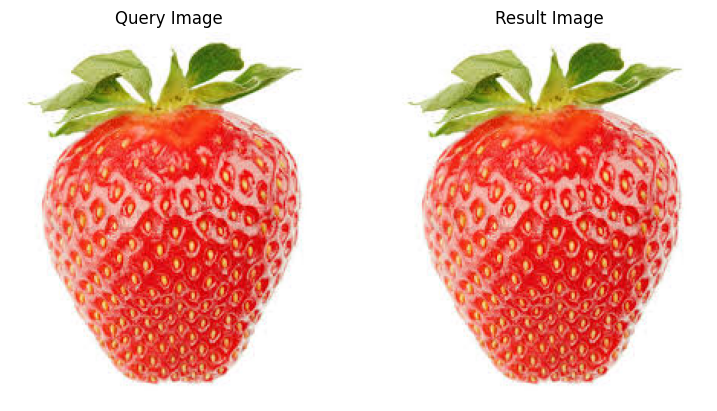

In [74]:
search = SearchEngine()
search.search('/content/drive/MyDrive/dip_classification/s.jpg')
